#A pandas cheatsheet

![pandas](https://images.unsplash.com/photo-1593526492327-b071f3d5333e?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80)


photo by [shiyang xu](https://unsplash.com/@ltmonster) at [Unsplash](https://unsplash.com/)


## Introduction

this is the companion colab code for my tutorial in medium about pandas introduction in Python , please read the article for better understanding of the code.  
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[article](https://)



note: the articles will be publish soon

In [1]:
import numpy as np
import pandas as pd

## Reading a file with pd.read_csv

you can read a file from directory or from an URL
* **pd.read_csv()** to read csv file
* **pd.read_excel()** to read excel file
* **pd.read_json()** to read json



In [2]:
#reading a csv file
#you can read from directory or directly from url
data_dir = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/Boston.csv"
df = pd.read_csv(data_dir)

In [10]:
#skip the first row
df = pd.read_csv(data_dir, skiprows = 1)
#skip the the first rows or a list of rows
df = pd.read_csv(data_dir, skiprows = [1,2,3])
df = pd.read_csv(data_dir, skiprows = [1,2,3,5,7,15])
#or use a programmatic loop
df = pd.read_csv(data_dir, skiprows = [i for i in range(10)])
#skip last rows
df = pd.read_csv(data_dir, skipfooter = 5)
#avoid the header, if there is no header in the csv
df = pd.read_csv(data_dir, header = None)
#when the first row is not header (there is extra text)
df = pd.read_csv(data_dir, header = 1)
#choose the column for the index
df = pd.read_csv(data_dir, index_col = 0)
#you can choose a selection of columns
df = pd.read_csv(data_dir, usecols = ["crim", "chas", "medv"])

## Inspecting the dataframe 

* **.head()** is a method to show the first entries, you can specify the number of rows you want to see
* **.tail()** to see the last rows
* **.columns** to check the columns name
* **.index** to check the index name
* **.shape** to check the dimension of the df
* **len()** to check how many rows
* **describe()** basic statistics
* **.dtypes** data types of the df or of a specific column
* **.info()** provide information about the df (not-null rows, data type)
* **nsmallest()** check the rows where our dataframe is smallest for a particular column
* **nlargest()** check the rows where our dataframe is largest for a particular column
* **rank** provide a rank of the dataframe according to a column
* **.query()** indexes of where a condition is met. It evaluate a boolean condition
* **.count()** the number data in a column
* **.value_counts()** count the value for each category in a categorical column
* **.unique()** return an array of the unique values in a column
* **.nunique()** return the number of the unique values in a column
* **pd.crosstab()** return a frequency table
* **.cumsum()** cumulative sum of dataframe or of selected columns
* **.corr()** matrix of correlation of a dataframe

In [12]:
df = pd.read_csv(data_dir, index_col = 0)
#df.head(10) if you want to see 10 rows instead of default 5
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [15]:
df.columns, df.index

(Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
        'ptratio', 'black', 'lstat', 'medv'],
       dtype='object'),
 Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
             ...
             497, 498, 499, 500, 501, 502, 503, 504, 505, 506],
            dtype='int64', length=506))

In [17]:
df.shape, len(df)

((506, 14), 506)

In [21]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
df.dtypes, df["crim"].dtypes

(crim       float64
 zn         float64
 indus      float64
 chas         int64
 nox        float64
 rm         float64
 age        float64
 dis        float64
 rad          int64
 tax          int64
 ptratio    float64
 black      float64
 lstat      float64
 medv       float64
 dtype: object, dtype('float64'))

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [22]:
#we want to check where our target variable is smallest/biggest
df.nsmallest(5, "medv")
df.nlargest(5, "medv")

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
162,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
163,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
164,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
167,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
187,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0


In [54]:
#create a rank column
df["most_exp"] =df["medv"].rank( )

In [26]:
df.query("indus > zn")

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [79]:
#we create a categorical variable
cat_col = np.random.randint(3, size=len(df))
df.insert(3, 'cat_col', cat_col)
#count
df["cat_col"].count(), df["cat_col"].value_counts()


(506, 2    180
 0    180
 1    146
 Name: cat_col, dtype: int64)

In [78]:
df.cat_col.unique(), df.cat_col.nunique()

(array([0, 2, 1]), 3)

In [80]:
#we create another categorical variable
cat_col1 = np.random.randint(5, size=len(df))
df.insert(4, 'cat_col1', cat_col1)
pd.crosstab(df['cat_col'], df['cat_col1'])

cat_col1,0,1,2,3,4
cat_col,,,,,
0,34,35,37,37,37
1,36,24,27,25,34
2,36,44,32,32,36


In [33]:
df[['zn', 'medv']].cumsum()

,zn,medv
1,18.0,24.0
2,18.0,45.6
3,18.0,80.3
4,18.0,113.7
5,18.0,149.9
...,...,...
502,5750.0,11323.2
503,5750.0,11343.8
504,5750.0,11367.7
505,5750.0,11389.7


In [106]:
df.corr()

,crim,zn,indus,cat_col,cat_col1,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,most_exp
crim,1.000000,-0.200469,0.406583,0.011883,-0.086940,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.447318
zn,-0.200469,1.000000,-0.533828,0.066823,0.083335,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.397761
indus,0.406583,-0.533828,1.000000,-0.040402,-0.100502,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.576583
cat_col,0.011883,0.066823,-0.040402,1.000000,-0.032547,0.046169,-0.039801,0.021079,-0.018580,0.014332,-0.073803,-0.074811,-0.084282,0.042445,0.005688,0.007523,0.008782
cat_col1,-0.086940,0.083335,-0.100502,-0.032547,1.000000,0.062125,-0.103153,0.014171,-0.104227,0.086647,-0.135258,-0.127263,-0.095777,0.104408,-0.135461,0.100428,0.108739
chas,-0.055892,-0.042697,0.062938,0.046169,0.062125,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.140612
nox,0.420972,-0.516604,0.763651,-0.039801,-0.103153,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.548416
rm,-0.219247,0.311991,-0.391676,0.021079,0.014171,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.627356
age,0.352734,-0.569537,0.644779,-0.018580,-0.104227,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.524093
dis,-0.379670,0.664408,-0.708027,0.014332,0.086647,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.370340


## Dataframe subset

* **.drop()** drop a index or a column, axis = 0 for a row, axis = 1 for a column
* **.pop()** return that column but it is also dropping from the dataframe
* **.insert()** insert a column, you can select the position and assign a name
* **.iloc()** subset a dataframe using as parameter index and column numbers
* **.loc()** subset a dataframe using as parameter index and column name
* **.where** subset according to a condition
* **.isin()** selecting rows if they are in a list
* **.sample()** select only a sample of the dataframe
* **.select_dtypes()** include or exclude a specifi data type

In [27]:
#drop an element
data = df.drop("medv", axis = 1)
#drop a selection of columns
data = df.drop(["medv", "zn"], axis = 1)

In [ ]:
#insert
#we create a categorical variable
cat_col = np.random.randint(3, size=len(df))
#df.insert(3, 'cat_col', cat_col)

In [30]:
#subset
df1 = df.iloc[10:20, :5]
df1 = df.loc[[1,5,7], ["medv", "zn"]]

In [38]:
#subset according to condition
df1 = df.where(df["rm"] > df["dis"])
df1 = df.where(df["rm"] > 5)

In [57]:
#use isin() to subset
cat = [0,1]
df1 = df[df["cat_col"].isin(cat)]

In [58]:
#sample the datatrame
df1 = df.sample(n = 100)
# a precentual fraction
df1 = df.sample(frac =0.33)

In [31]:
#include or exclude data type column
df1 = df.select_dtypes(include='int64')
df1 = df.select_dtypes(exclude='int64')

## Dataframe modification

* **.rename()** rename a column
* **.replace()** replace values with other values
* **.fillna()** fill the NA

In [62]:
df1 = df.copy()
df1.rename(columns = {"cat_col": "categorical", "medv": "house price"})

,crim,zn,indus,categorical,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,house price,most_exp
1,0.00632,18.0,2.31,0,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,350.5
2,0.02731,0.0,7.07,2,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,264.5
3,0.02729,0.0,7.07,0,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,455.0
4,0.03237,0.0,2.18,1,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,451.5
5,0.06905,0.0,2.18,1,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,465.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,2,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,293.5
503,0.04527,0.0,11.93,0,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,236.5
504,0.06076,0.0,11.93,1,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,347.0
505,0.10959,0.0,11.93,0,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,281.0


In [61]:
df1 = df.copy()
#replace a value everywhere
df1.replace(2, 5)
df1.replace({2:5, 3:5})
#in a single  column
df1.cat_col = df1.cat_col.replace(2, 5)

In [75]:
#insert a NA
df1.iloc[1,1] = np.nan
#fill the NA with a value
df1.fillna(0, inplace=True)
#in a specific column
df1.zn.fillna(0, inplace=True)

## Grouping

Grouping to perform following analysis, you can use different aggreating function from mean, standard deviation, median, count, size, variance, sum.

In [82]:
#we are grouping a categorical variable
df.groupby("cat_col")['medv'].mean()

cat_col
0    22.448333
1    22.539041
2    22.612222
Name: medv, dtype: float64

In [90]:
#group by different variables
df.groupby(['cat_col', 'cat_col1'])['lstat', 'medv'].agg([np.mean, np.median])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


lstat               medv       
                       mean  median       mean median
cat_col cat_col1                                     
0       0         15.607647  14.045  19.658824  19.55
        1         13.438286  12.430  20.934286  21.70
        2         12.539459  11.450  23.364865  21.70
        3         12.204595  12.400  23.256757  20.40
        4         10.684054   9.090  24.718919  24.10
1       0         11.368056  10.480  23.058333  21.60
        1         11.499583   9.980  22.445833  21.20
        2         13.227037  12.140  23.303704  21.70
        3         13.459600  10.130  19.708000  19.60
        4         11.252647  10.375  23.529412  21.50
2       0         15.323333  15.625  19.522222  18.25
        1         12.793636  11.060  24.118182  22.45
        2         13.878125  12.310  22.056250  20.65
        3         12.034687  11.240  22.921875  21.60
        4         10.705278   9.260  24.080556  23.25

In [91]:
#different aggregating function on different columns
df.groupby('cat_col').agg({'lstat': ['min', 'max', 'var', 'std'], 
                                 'medv': ['median','mean', 'sum']})

lstat                               medv                   
          min    max        var       std median       mean     sum
cat_col                                                            
0        1.92  34.37  51.316449  7.163550   21.1  22.448333  4040.7
1        2.94  34.41  41.025284  6.405098   21.0  22.539041  3290.7
2        1.73  37.97  58.917194  7.675754   21.3  22.612222  4070.2

In [94]:
#custom function
df.groupby(df['medv'].apply(lambda x: x > 10)).size()

medv
False     24
True     482
dtype: int64

## Basic visualization

Pandas has some built in function for plotting, let's seen how they works
* **boxplot()** boxplot of one or more variables
* **scatter_matrix()** Draw a matrix of scatter plots
* **parallel_coordinates()** Parallel coordinates plotting
* **parallel_coordinates()** Andrews curves plotting [to know more about Andrews curve](https://en.wikipedia.org/wiki/Andrews_plot#:~:text=In%20data%20visualization%2C%20an%20Andrews,Andrews.)
* **hist()** draw an histogram, you can change the number of bins or make stacked
* **kde()** to plot the density function of a coumn
* **plot()** this function allow you to draw different plot (histogram, scatter) in a easy way

you can find here the official guide for plotting with pandas:
[official documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [83]:
df.columns

Index(['crim', 'zn', 'indus', 'cat_col', 'cat_col1', 'chas', 'nox', 'rm',
       'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv',
       'most_exp'],
      dtype='object')

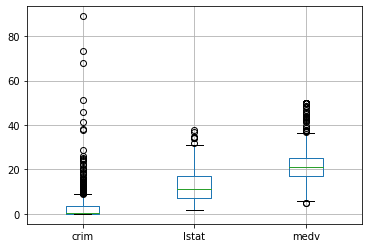

In [84]:
boxplot = df.boxplot(column=['crim', 'lstat', 'medv'])  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaafe1f950>,
      dtype=object)

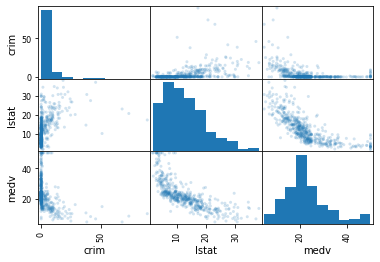

In [86]:
pd.plotting.scatter_matrix(df[['crim', 'lstat', 'medv']], alpha=0.2)

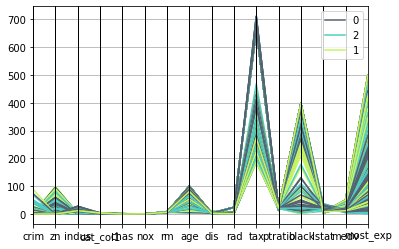

In [87]:
pd.plotting.parallel_coordinates(df, 'cat_col', color=('#556270', '#4ECDC4', '#C7F464'))

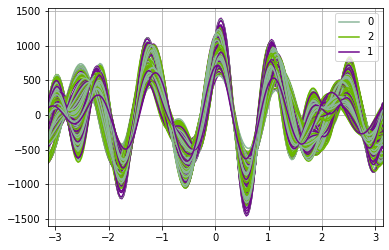

In [88]:
pd.plotting.andrews_curves(df, 'cat_col')

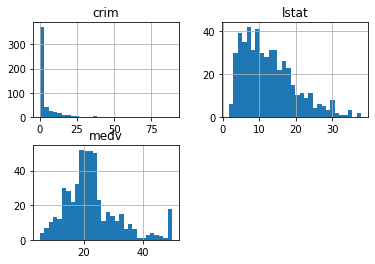

In [89]:
hist = df[['crim', 'lstat', 'medv']].hist(bins=30)

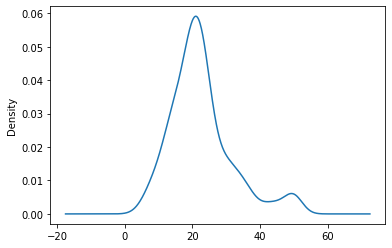

In [105]:
df.medv.plot.kde()

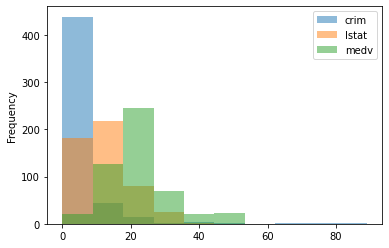

In [100]:
 df[['crim', 'lstat', 'medv']].plot.hist(alpha=0.5);

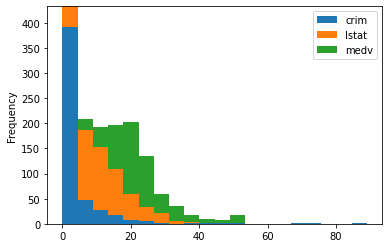

In [101]:
 df[['crim', 'lstat', 'medv']].plot.hist(stacked=True, bins=20)

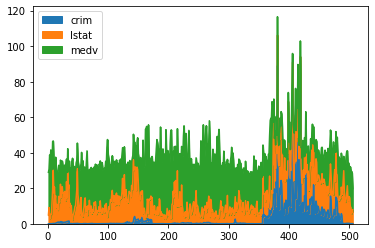

In [102]:
df[['crim', 'lstat', 'medv']].plot.area()

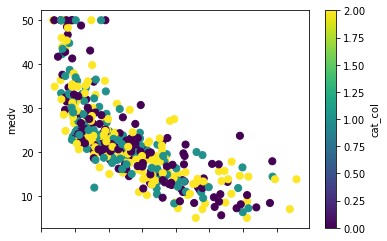

In [103]:
df.plot.scatter(x="lstat", y="medv", c="cat_col", cmap="viridis", s=50)

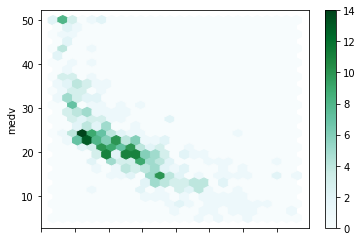

In [104]:
df.plot.hexbin(x="lstat", y="medv", gridsize=25);

## Lambda functions and pandas

In [108]:
df = pd.DataFrame(columns= ["a", "b"])
df["a"] = [i for i in range(10)]
df["b"] = np.random.randint(10, size=len(df))

In [111]:
#apply lambda function with one column
df["c"] = df["a"].apply(lambda x: x*x)
df

,a,b,c
0,0,8,0
1,1,7,1
2,2,4,4
3,3,2,9
4,4,7,16
5,5,5,25
6,6,9,36
7,7,0,49
8,8,7,64
9,9,0,81


In [123]:
#apply a custom function
def sum_col(x):
  return x[0] + x[1]  
df["d"] = df.apply(sum_col, axis = 1)
df

,a,b,c,d
0,0,8,0,8
1,1,7,1,8
2,2,4,4,6
3,3,2,9,5
4,4,7,16,11
5,5,5,25,10
6,6,9,36,15
7,7,0,49,7
8,8,7,64,15
9,9,0,81,9


## pivoting and melting a dataframe

* **pivot_table()** create a pivot table aggreganting values
* **melt()** and **reshape()** to reshape your dataframe

In [135]:
df = pd.DataFrame(columns= ["a", "b", "c"])
df["a"] = [i for i in range(10)]
l=['A', 'B', 'C']
df["b"] = np.random.randint(10, size=len(df))
df["c"] = [l[np.random.randint(3)] for i in range(len(df))]

In [141]:
df.pivot_table(index = 'c', values = 'a')

,a
c,
A,3.666667
B,6.000000
C,2.000000


In [142]:
#use another aggregating function
df.pivot_table(index = 'c', values = 'a', aggfunc='sum')

,a
c,
A,11
B,30
C,4


In [143]:
pd.melt(df, id_vars =['c'], value_vars =['a'])

,c,variable,value
0,C,a,0
1,A,a,1
2,A,a,2
3,B,a,3
4,C,a,4
5,B,a,5
6,B,a,6
7,B,a,7
8,A,a,8
9,B,a,9


In [144]:
pd.melt(df, id_vars =['c'], value_vars =['a', 'b'])

,c,variable,value
0,C,a,0
1,A,a,1
2,A,a,2
3,B,a,3
4,C,a,4
5,B,a,5
6,B,a,6
7,B,a,7
8,A,a,8
9,B,a,9
